### Equilibrium problems

Find the reaction forces in $A$ and $B$

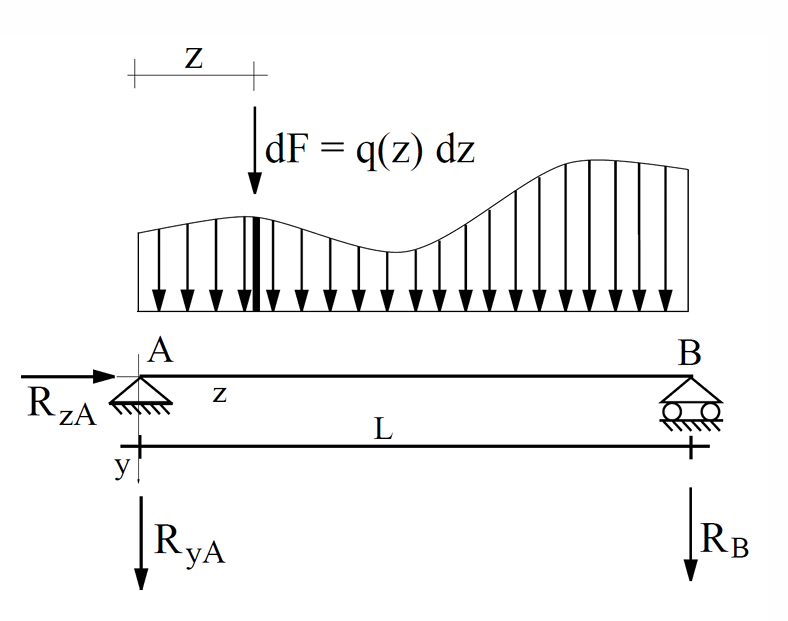

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Variables
F, R_BV, R_AH, R_AV = smp.symbols("F \\R_{BV} \\R_{AH} \\R_{AV}", real = True, nonnegative = True)
z = smp.symbols("z", real = True, nonnegative = True)
q = smp.Function("q", real = True, nonnegative = True)(z)

# Constants
L = smp.symbols("L", real = True, positive = True, constant = True)

# x and y unit vectors
x = smp.Matrix([1, 0, 0])
y = smp.Matrix([0, 1, 0])

# Forces
dF = - q * y
Fv = smp.integrate(dF, (z, 0, L))

R_AHv = R_AH * x
R_AVv = R_AV * y
R_BVv = R_BV * y

# Application point
B = smp.Matrix([L, 0, 0])

In [3]:
# Equations
m1 = R_AHv + R_AVv + Fv + R_BVv # Sum of the forces = 0
m2 = smp.integrate((z * x).cross(dF), (z, 0, L)) + B.cross(R_BVv) # Sum of the moments = 0, A as the pole

In [4]:
m1

Matrix([
[                                      \R_{AH}],
[\R_{AV} + \R_{BV} - Integral(q(z), (z, 0, L))],
[                                            0]])

In [5]:
m2

Matrix([
[                                      0],
[                                      0],
[L*\R_{BV} - Integral(z*q(z), (z, 0, L))]])

In [6]:
# Finding the unknown forces
equations = smp.Matrix.vstack(m1, m2)
variables = [R_BV, R_AH, R_AV]

sol = smp.solve(equations, variables)
sol # General solutions

{\R_{AH}: 0,
 \R_{AV}: Integral(q(z), (z, 0, L)) - Integral(z*q(z), (z, 0, L))/L,
 \R_{BV}: Integral(z*q(z), (z, 0, L))/L}

In [7]:
# Always zero
sol[R_AH]

0

In [8]:
sol[R_AV]

Integral(q(z), (z, 0, L)) - Integral(z*q(z), (z, 0, L))/L

In [9]:
sol[R_BV]

Integral(z*q(z), (z, 0, L))/L

Let's model $q(z) = q$

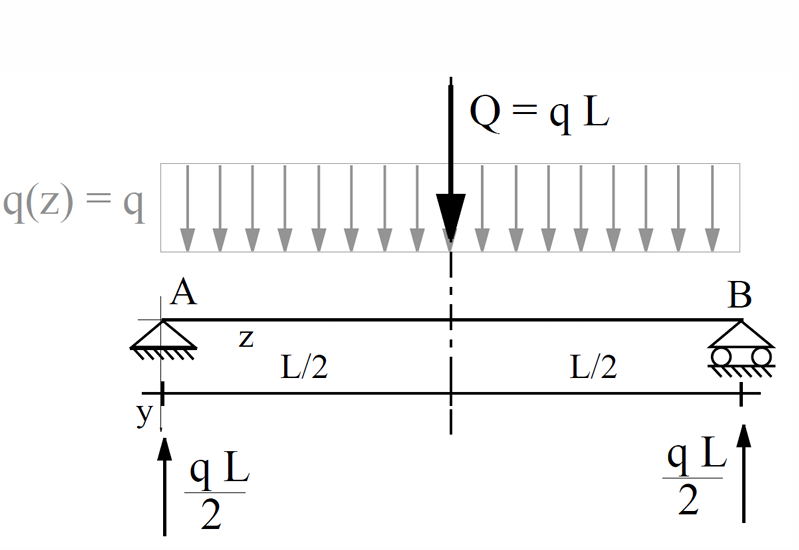

In [10]:
k = smp.symbols("q", real = True, positive = True, constant = True)
load = k

In [11]:
sol[R_AV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/2],
[    0]])

In [12]:
sol[R_BV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/2],
[    0]])

Let $q(z)$ be:

$$
        q(z) = \begin{cases}
                q \quad z < \frac{L}{2} \\
                - q \quad z \geq \frac{L}{2}
                \end{cases}
$$

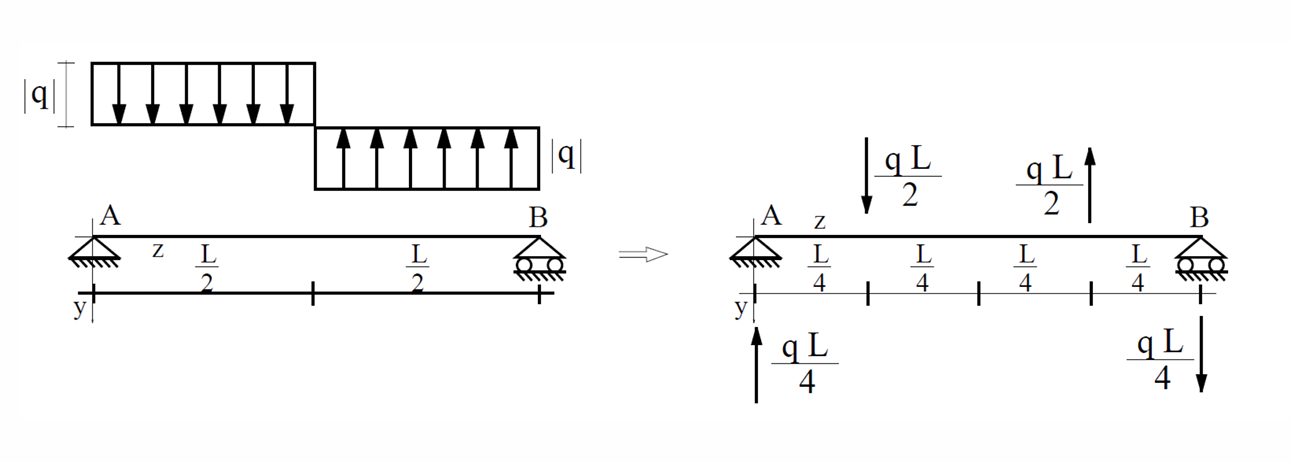

In [13]:
load = smp.Piecewise((k, z < L / 2), (- k, z >= L / 2))

In [14]:
sol[R_AV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/4],
[    0]])

In [15]:
sol[R_BV].subs(q, load).doit() * y

Matrix([
[     0],
[-L*q/4],
[     0]])

Let $q(z)$ be a triangular load:

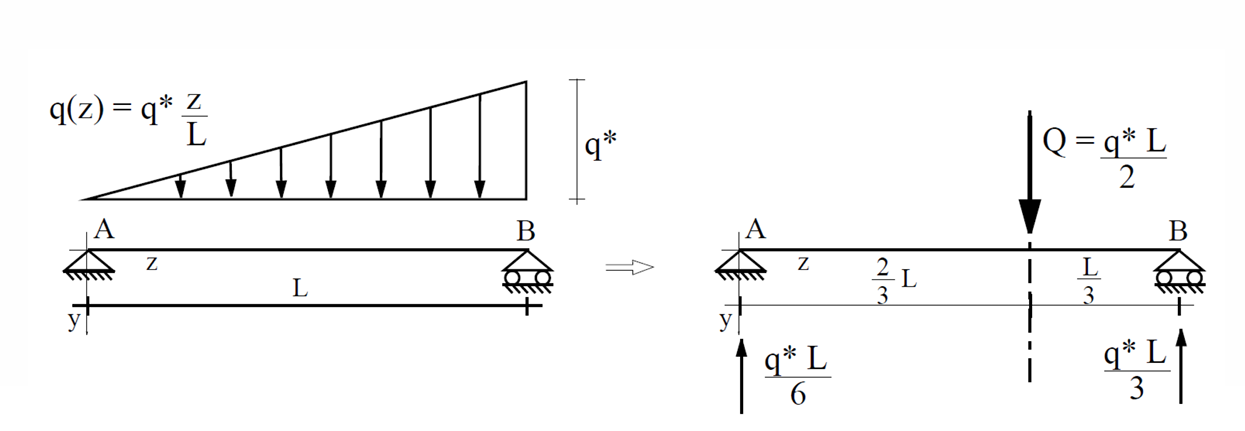

In [16]:
load = k * z / L

In [17]:
sol[R_AV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/6],
[    0]])

In [18]:
sol[R_BV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/3],
[    0]])

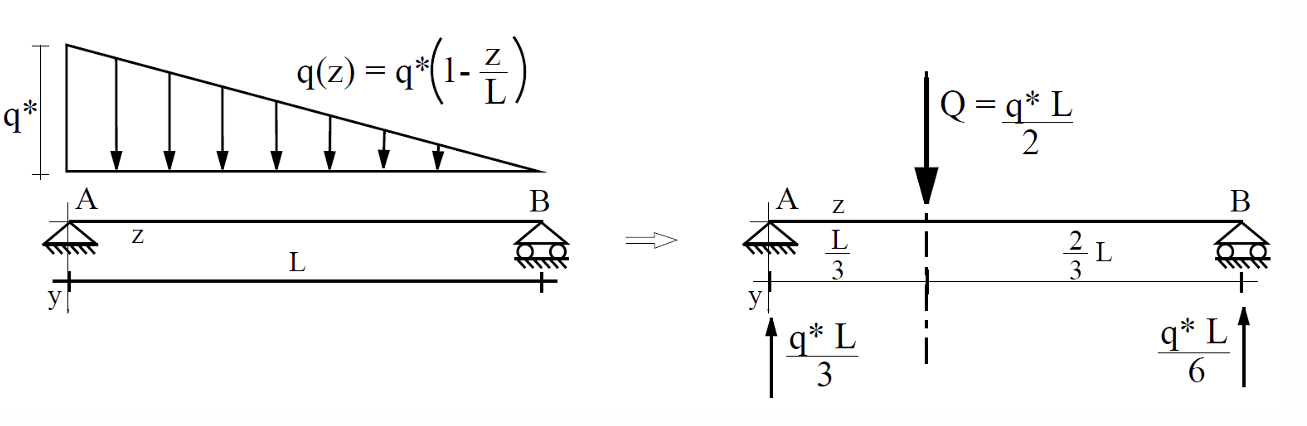

In [19]:
load = k * (1 - z / L)

In [20]:
sol[R_AV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/3],
[    0]])

In [21]:
sol[R_BV].subs(q, load).doit() * y

Matrix([
[    0],
[L*q/6],
[    0]])

Find the reaction forces for these two beams:

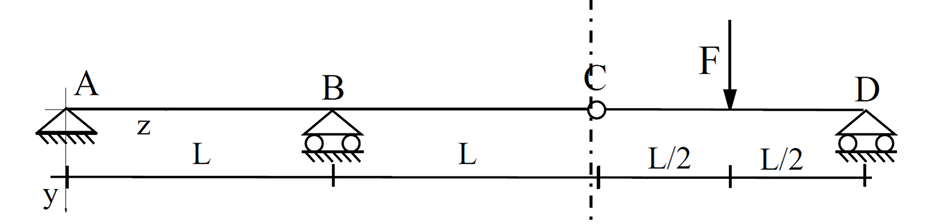

In [22]:
# New forces: R_DV and F and the forces in C
R_DV, F, R_CH, R_CV = smp.symbols("\\R_{DV} F \\R_{CH} \\R_{CV}", real = True, nonnegative = True)

# External force
Fv = - F * y

# Reaction force R_DV and in C
R_DVv = R_DV * y

R_CH_leftv = R_CH * x
R_CV_leftv = R_CV * y
R_CH_rightv = - R_CH * x
R_CV_rightv = - R_CV * y

# Application points: C, D and F
C = smp.Matrix([2 * L, 0, 0])
D = smp.Matrix([3 * L, 0, 0])
F_point = smp.Matrix([2 * L + L / 2, 0, 0])

In [23]:
# Equations
m1_left = R_AHv + R_AVv + R_BVv + R_CH_leftv + R_CV_leftv # Sum of the forces = 0, left beam
m2_left = B.cross(R_BVv) + C.cross(R_CH_leftv) + C.cross(R_CV_leftv) # Sum of the moments = 0, left beam (A as the pole)

m1_right = Fv + R_DVv + R_CH_rightv + R_CV_rightv # Sum of the forces = 0, right beam
m2_right = C.cross(R_CH_rightv) + C.cross(R_CV_rightv) + F_point.cross(Fv) + D.cross(R_DVv) # Sum of the moments = 0, right beam (A as the pole)

In [24]:
m1_left

Matrix([
[          \R_{AH} + \R_{CH}],
[\R_{AV} + \R_{BV} + \R_{CV}],
[                          0]])

In [25]:
m2_left

Matrix([
[                      0],
[                      0],
[L*\R_{BV} + 2*L*\R_{CV}]])

In [26]:
m1_right

Matrix([
[              -\R_{CH}],
[-F - \R_{CV} + \R_{DV}],
[                     0]])

In [27]:
m2_right

Matrix([
[                                   0],
[                                   0],
[-5*F*L/2 - 2*L*\R_{CV} + 3*L*\R_{DV}]])

In [28]:
# Finding the unknown forces
equations = smp.Matrix.vstack(m1_left, m2_left, m1_right, m2_right)
variables = [R_BV, R_AH, R_AV, R_DV, R_CH, R_CV]

sol = smp.solve(equations, variables)
sol

{\R_{AH}: 0,
 \R_{AV}: -F/2,
 \R_{BV}: F,
 \R_{CH}: 0,
 \R_{CV}: -F/2,
 \R_{DV}: F/2}

In [29]:
sol[R_AH] * x

Matrix([
[0],
[0],
[0]])

In [30]:
sol[R_AV] * y

Matrix([
[   0],
[-F/2],
[   0]])

In [31]:
sol[R_BV] * y

Matrix([
[0],
[F],
[0]])

In [32]:
sol[R_CH] * x

Matrix([
[0],
[0],
[0]])

In [33]:
# Left side
sol[R_CV] * y

Matrix([
[   0],
[-F/2],
[   0]])

In [34]:
# Right side
- sol[R_CV] * y

Matrix([
[  0],
[F/2],
[  0]])

In [35]:
sol[R_DV] * y

Matrix([
[  0],
[F/2],
[  0]])